## Support Vector Machines (SVM)

<div>
<img src="figures/SVM_margin.png" width="400"/>
</div>

(figure by [Wikipedia 2018](https://en.wikipedia.org/wiki/Support_vector_machine#/media/File:SVM_margin.png) )


Support Vector Machine (SVM) classifies data by identifying the best way to separate different groups within a multidimensional space. It does this by finding the maximum margin between the closest data points of opposing groups, thus creating the optimal hyperplane. The dimensionality of the input data determines whether this hyperplane is a line in a 2D space or a plane in a higher-dimensional space. SVM is widely used in machine learning because it is effective for both linear and nonlinear classification tasks. When the data is not linearly separable, kernel functions are applied to transform the data, enabling linear separation. This technique is known as the 'kernel trick'. The choice of kernel depends on the specific data and task at hand.

**Support Vectors**

Support vectors are the data points closest to the hyperplane. They help define the separating line by calculating margins, making them crucial for building the classifier.

**Hyperplane**

A hyperplane is a decision boundary that separates a set of objects into different classes.

**Margin**

A margin is the gap between two lines that are closest to the class points. It is measured as the perpendicular distance from these lines to the support vectors or closest points. A larger margin between the classes is considered good, while a smaller margin is considered bad.


### SVM Implementation 

Now, we will learn about its implementation in Python using `scikit-learn`.


#### Data generation
First, lets consider some articifial data: 

In [1]:
%load_ext lab_black

In [2]:
# First, let's import all the needed libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import make_blobs

import warnings

warnings.filterwarnings("ignore", "use_inf_as_na")

In [ ]:
np.random.seed(28)
X, y = make_blobs(
    n_samples=20,
    n_features=2,
    centers=[[40, 5500], [65, 15000]],
    #  center_box=(0, 200),
    cluster_std=[[4, 1700], [4, 2000]],
)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (g)")
plt.legend(*scatter.legend_elements())
plt.show()

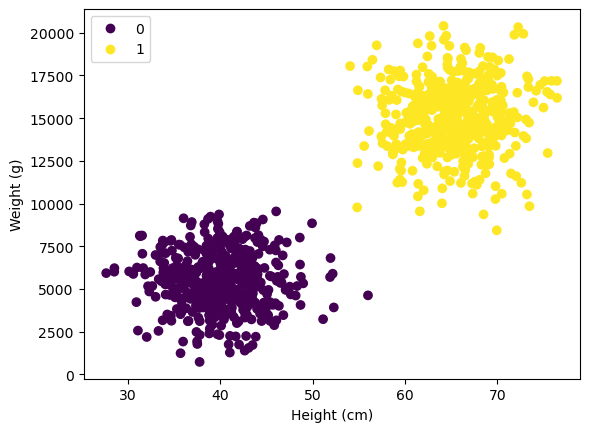

In [3]:
np.random.seed(28)
X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=[[40, 5500], [65, 15000]],
    #  center_box=(0, 200),
    cluster_std=[[4, 1700], [4, 2000]],
)

scatter = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (g)")
plt.legend(*scatter.legend_elements())
plt.show()

Lets imagine we are dealing with 1000 height and weight samples of cats and dogs. No we want to train a linear classifier to seperate the two based on the height/ weight ratio. "0" stands for cats and "1" for dogs.

### Train-Test Splitting

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=109
)  # 70% training and 30% test

### Train SVM Model

In [5]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel="linear")  # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluate Model

In [6]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [7]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

Precision: 1.0
Recall: 1.0


In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
#ax.set_xticks(())
#ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [ ]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
from sklearn import svm
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(
    kernel, ax=None, long_title=True, support_vectors=True
):
    # Train the SVC
    clf = svm.SVC(kernel=kernel, gamma=2).fit(X, y)

    # Settings for plotting
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 3))
    x_min, x_max, y_min, y_max = -3, 3, -3, 3
    ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Plot bigger circles around samples that serve as support vectors
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # Plot samples by color and add legend
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
    ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
    if long_title:
        ax.set_title(f" Decision boundaries of {kernel} kernel in SVC")
    else:
        ax.set_title(kernel)

    if ax is None:
        plt.show()

**Feature Scaling**

Feature Scaling refers to the technique of converting the numeric data into a standard range to improvise the performance of algorithms. This is obtained by normalizing or standardizing the data values. One of the most common feature-scaling techniques is min-max scaling which will be implemented here.

Min-max scaling is a feature scaling technique that involves the subtraction of the minimum value in the attribute with each observation and then dividing this by the range of the attribute.

Here, attributes: ‘bright_t31’, ‘brightness’, and ‘frp’ undergo min-max scaling. The technique will result in the transformation of all these attributes into normalized numerical form in the range of 0 to 1.

In [18]:
def min_max(variable, xmin = None, xmax = None):
    if (xmin != None) & (xmax == None):  ## no we are able to set xmin manually
        xmax = variable.max()
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
        return xmin, xmax, min_max_done
    elif (xmin != None) & (xmax != None):  ## no we are able to set xmin and xmax manually
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
        return xmin, xmax, min_max_done
    else:
        xmin, xmax = variable.min(), variable.max()
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
    return xmin, xmax, min_max_done

#### Working Data Set example: Crop Recommendations

For building the SVM model we will use the Crop Recommendation Dataset. our aim is to **Maximize agricultural yield by recommending appropriate crops**. You can find this example on [kaggle here](https://www.kaggle.com/code/atharvaingle/what-crop-to-grow#Support-Vector-Machine-(SVM)) and you can download the data from [kaggle here](https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset).

**About the data set:**

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India.

**Data fields**

* `N` - ratio of Nitrogen content in soil
* `P` - ratio of Phosphorous content in soil
* `K` - ratio of Potassium content in soil
* `temperature` - temperature in degree Celsius
* `humidity` - relative humidity in %
* `ph` - ph value of the soil
* `rainfall` - rainfall in mm

#### Ressources for this script: 

SVM:
* [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/svm.html)

In [1]:
from IPython.display import IFrame

IFrame(
    src="../../citations/citation_Marie.html",
    width=900,
    height=200,
)